## Análisis de Correspondencia Simple

In [1]:
library(readxl)
# Para listar las hojas que hay:
#excel_sheets(path="datasets/Tareas_hogar.xlsx")

tareas_hogar <- suppressMessages(read_excel("datasets/Tareas_hogar.xlsx", sheet="Hoja1"))
tareas_hogar<-as.data.frame(tareas_hogar)
rownames(tareas_hogar) <- tareas_hogar[,1]
tareas_hogar[,1] <- NULL
tabla_contingencia<-addmargins(as.matrix(tareas_hogar))
tabla_contingencia

,Esposa,Alternado,Esposo,En conjunto,Sum
Lavanderia,156,14,2,4,176
Comida principal,124,20,5,4,153
Cena,77,11,7,13,108
Desayuno,82,36,15,7,140
Ordenar,53,11,1,57,122
Lavar platos,32,24,4,53,113
Compras,33,23,9,55,120
Tramites oficiales,12,46,23,15,96
Manejar,10,51,75,3,139
Finanzas,13,13,21,66,113


Se hace el perfil marginal del aporte de cada una de las tareas y quién se hace cargo.

In [2]:
#Tabla de frecuencias relativas
tbl_contingencia_prop <- addmargins(
    round(
        prop.table(as.matrix(tareas_hogar)), #sacamos la matriz de proporciones
        4 
    ) # redondeamos a 4 dígitos    
)
# El add margins se hace hasta después, porque si no también saca la 
# proporción de la suma, en lugar de sólo hacer la suma.
tbl_contingencia_prop

,Esposa,Alternado,Esposo,En conjunto,Sum
Lavanderia,0.0894,0.0080,0.0011,0.0023,0.1008
Comida principal,0.0711,0.0115,0.0029,0.0023,0.0878
Cena,0.0442,0.0063,0.0040,0.0075,0.0620
Desayuno,0.0470,0.0206,0.0086,0.0040,0.0802
Ordenar,0.0304,0.0063,0.0006,0.0327,0.0700
Lavar platos,0.0183,0.0138,0.0023,0.0304,0.0648
Compras,0.0189,0.0132,0.0052,0.0315,0.0688
Tramites oficiales,0.0069,0.0264,0.0132,0.0086,0.0551
Manejar,0.0057,0.0292,0.0430,0.0017,0.0796
Finanzas,0.0075,0.0075,0.0120,0.0378,0.0648


Se hace el perfil marginal de las aportaciones a cada una de las tareas por persona (análisis por filas)


In [3]:
addmargins(
    round(
        prop.table(as.matrix(tareas_hogar), margin=1),
        4
    ),
    2
)

,Esposa,Alternado,Esposo,En conjunto,Sum
Lavanderia,0.8864,0.0795,0.0114,0.0227,1.0000
Comida principal,0.8105,0.1307,0.0327,0.0261,1.0000
Cena,0.7130,0.1019,0.0648,0.1204,1.0001
Desayuno,0.5857,0.2571,0.1071,0.0500,0.9999
Ordenar,0.4344,0.0902,0.0082,0.4672,1.0000
Lavar platos,0.2832,0.2124,0.0354,0.4690,1.0000
Compras,0.2750,0.1917,0.0750,0.4583,1.0000
Tramites oficiales,0.1250,0.4792,0.2396,0.1562,1.0000
Manejar,0.0719,0.3669,0.5396,0.0216,1.0000
Finanzas,0.1150,0.1150,0.1858,0.5841,0.9999


Se hace el perfil marginal de cada una de las personas y qué actividades lleva a cabo (análisis por columnas)

In [4]:
addmargins(
    round(
        prop.table(as.matrix(tareas_hogar), margin=2),
        4
    ),
    1
)

,Esposa,Alternado,Esposo,En conjunto
Lavanderia,0.2600,0.0551,0.0052,0.0079
Comida principal,0.2067,0.0787,0.0131,0.0079
Cena,0.1283,0.0433,0.0184,0.0255
Desayuno,0.1367,0.1417,0.0394,0.0138
Ordenar,0.0883,0.0433,0.0026,0.1120
Lavar platos,0.0533,0.0945,0.0105,0.1041
Compras,0.0550,0.0906,0.0236,0.1081
Tramites oficiales,0.0200,0.1811,0.0604,0.0295
Manejar,0.0167,0.2008,0.1969,0.0059
Finanzas,0.0217,0.0512,0.0551,0.1297


In [5]:
library(gmodels)
CrossTable(as.matrix(tareas_hogar))


 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  1744 

 
                   |  
                   |      Esposa |   Alternado |      Esposo | En conjunto |   Row Total | 
-------------------|-------------|-------------|-------------|-------------|-------------|
        Lavanderia |         156 |          14 |           2 |           4 |         176 | 
                   |     150.463 |       5.279 |      34.554 |      43.678 |             | 
                   |       0.886 |       0.080 |       0.011 |       0.023 |       0.101 | 
                   |       0.260 |       0.055 |       0.005 |       0.008 |             | 
                   |       0.089 |       0.008 |       0.001 |       0.002 |             | 
-------------------|-------------|-------------|-------------|-------------|

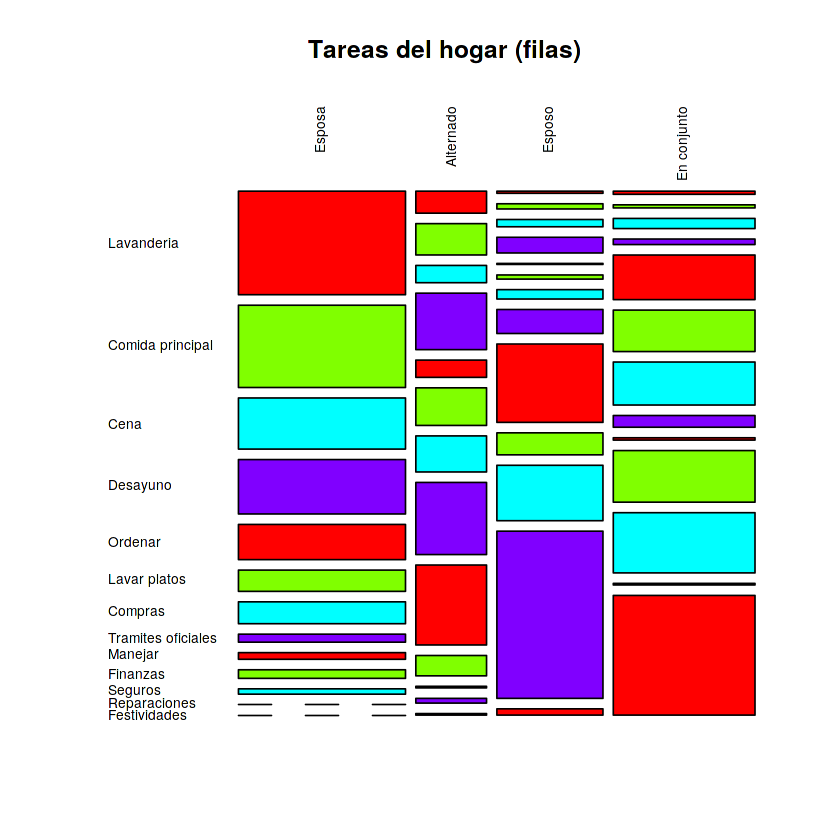

In [6]:
library(graphics)
mosaicplot(
    x=t(tareas_hogar),
    las=2, #Estilo de las etiquetas del eje    
    main="Tareas del hogar (filas)",
    color=rainbow(4)
)

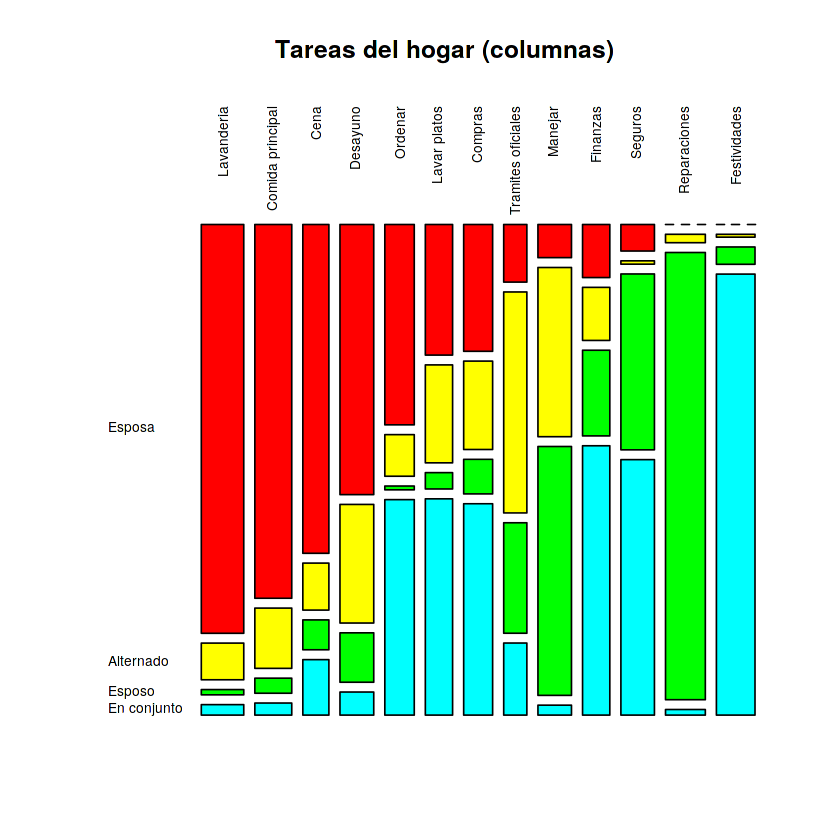

In [7]:
library(graphics)
mosaicplot(
    x=tareas_hogar,
    las=2, #Estilo de las etiquetas del eje
    main="Tareas del hogar (columnas)",
    color=rainbow(6)
)

## Probando la independencia de las variables

  - $H_0$: Ambas variables nominales son independientes.
  - $H_1$: Existe una relación de dependencia entre las variables categóricas del estudio.

Dado un nivel de significancia de $\alpha$ se lo que se busca es rechazar estadísticamente la aseveración nula (hipótesis nula) ($p_{valor} \lt \alpha$)

In [8]:
library(FactoMineR)
tareas_hogar_ca <- CA(tareas_hogar, graph=FALSE)

summary(tareas_hogar_ca)


Call:
CA(X = tareas_hogar, graph = FALSE) 

The chi square of independence between the two variables is equal to 1944.456 (p-value =  0 ).

Eigenvalues
                       Dim.1   Dim.2   Dim.3
Variance               0.543   0.445   0.127
% of var.             48.692  39.913  11.395
Cumulative % of var.  48.692  88.605 100.000

Rows (the 10 first)
                     Iner*1000     Dim.1     ctr    cos2     Dim.2     ctr
Lavanderia         |   134.160 |  -0.992  18.287   0.740 |   0.495   5.564
Comida principal   |    90.692 |  -0.876  12.389   0.742 |   0.490   4.736
Cena               |    38.246 |  -0.693   5.471   0.777 |   0.308   1.321
Desayuno           |    41.124 |  -0.509   3.825   0.505 |   0.453   3.699
Ordenar            |    24.667 |  -0.394   1.998   0.440 |  -0.434   2.966
Lavar platos       |    19.587 |  -0.189   0.426   0.118 |  -0.442   2.844
Compras            |    14.970 |  -0.118   0.176   0.064 |  -0.403   2.515
Tramites oficiales |    53.300 |   0.227   0.5

In [9]:
chi<-chisq.test(tareas_hogar)
chi


	Pearson's Chi-squared test

data:  tareas_hogar
X-squared = 1944.5, df = 36, p-value < 2.2e-16


In [10]:
inercia_fila<-as.data.frame(tareas_hogar_ca$row$inertia)
rownames(inercia_fila)<-rownames(tareas_hogar)
colnames(inercia_fila)<-"aportacion"
inercia_fila

,aportacion
,<dbl>
Lavanderia,0.13415976
Comida principal,0.09069235
Cena,0.03824633
Desayuno,0.04112368
Ordenar,0.02466697
Lavar platos,0.01958732
Compras,0.01497017
Tramites oficiales,0.05330000
Manejar,0.10150885


In [11]:
inercia_columna<-as.data.frame(tareas_hogar_ca$col$inertia)
rownames(inercia_columna)<-colnames(tareas_hogar)
colnames(inercia_columna)<-"aportacion"
inercia_columna

,aportacion
,<dbl>
Esposa,0.3010185
Alternado,0.1178242
Esposo,0.3813729
En conjunto,0.3147248


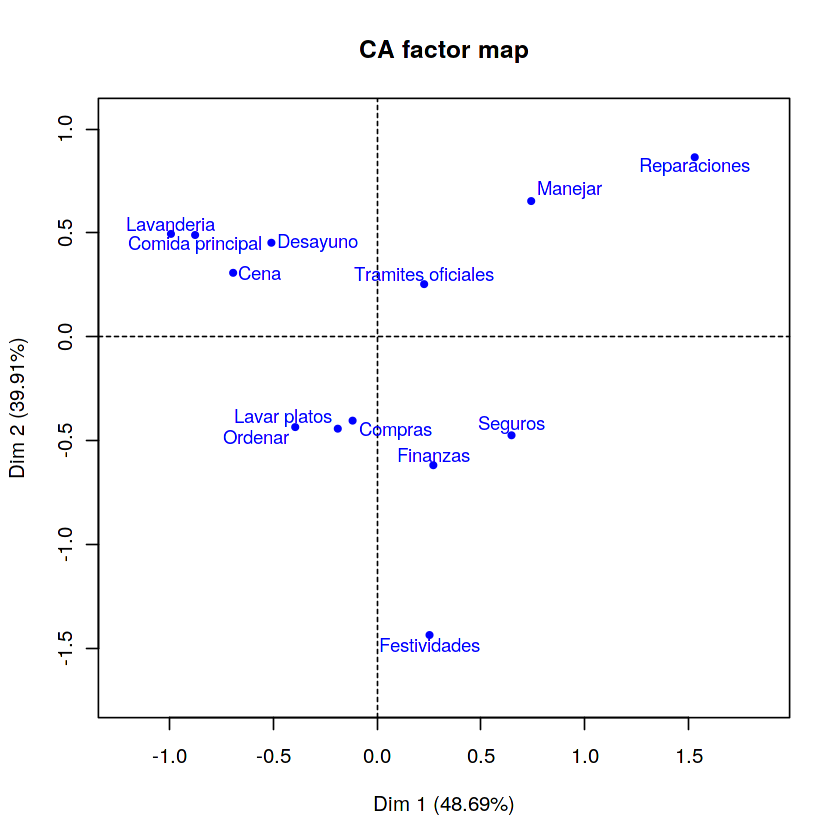

In [12]:
plot(tareas_hogar_ca, invisible=c("col"), cex=0.9)

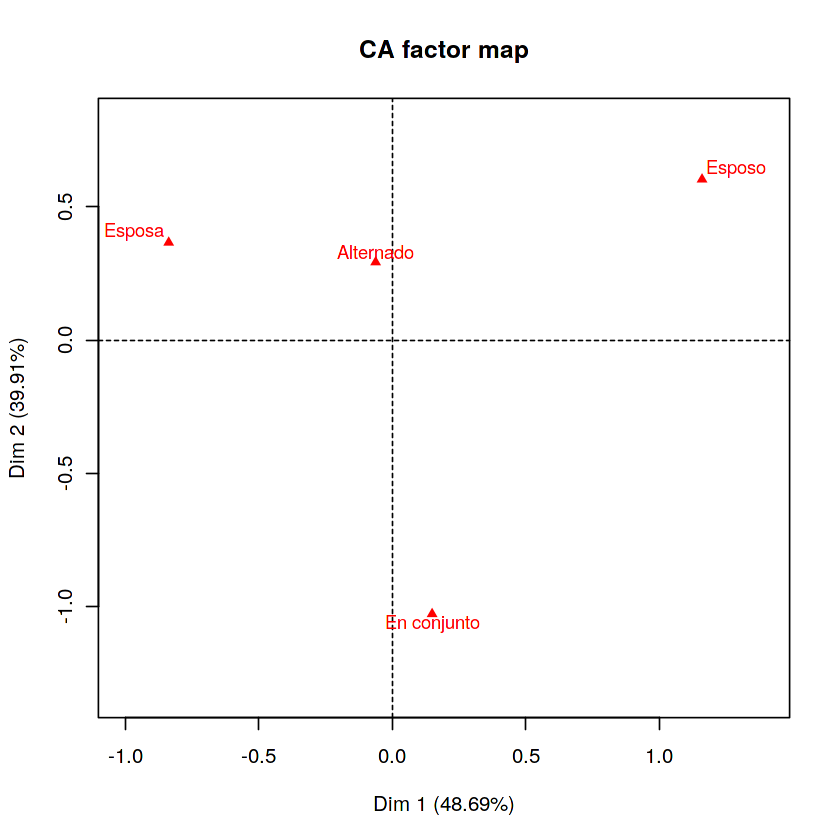

In [13]:
plot(tareas_hogar_ca, invisible=c("row"), cex=0.9)

## Usando STHDA


Attaching package: 'gplots'

The following object is masked from 'package:stats':

    lowess



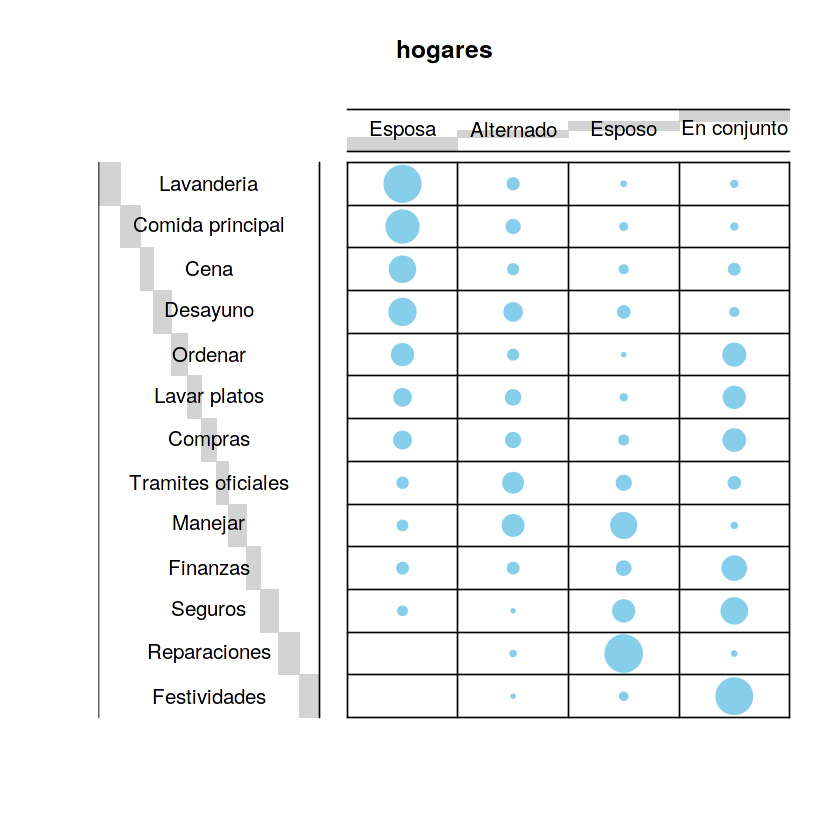

In [14]:
library("gplots")
# 1. convert the data as a table
dt <- as.table(as.matrix(tareas_hogar))
# 2. Graph
balloonplot(
    t(dt[,]),
    main ="hogares",
    xlab ="",
    ylab="",
    label = FALSE,
    show.margins = F #Para mostrar las sumas de m y n.
)

Loading required package: magrittr


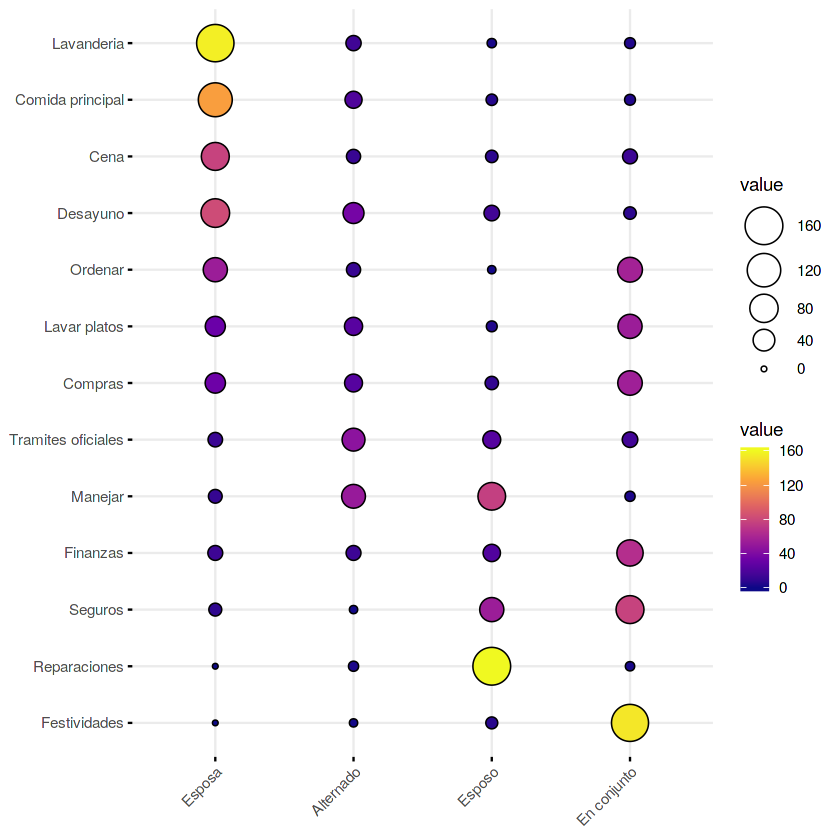

In [19]:
library(ggpubr)
ggballoonplot(tareas_hogar, fill = "value")+
    scale_fill_viridis_c(option = "C")

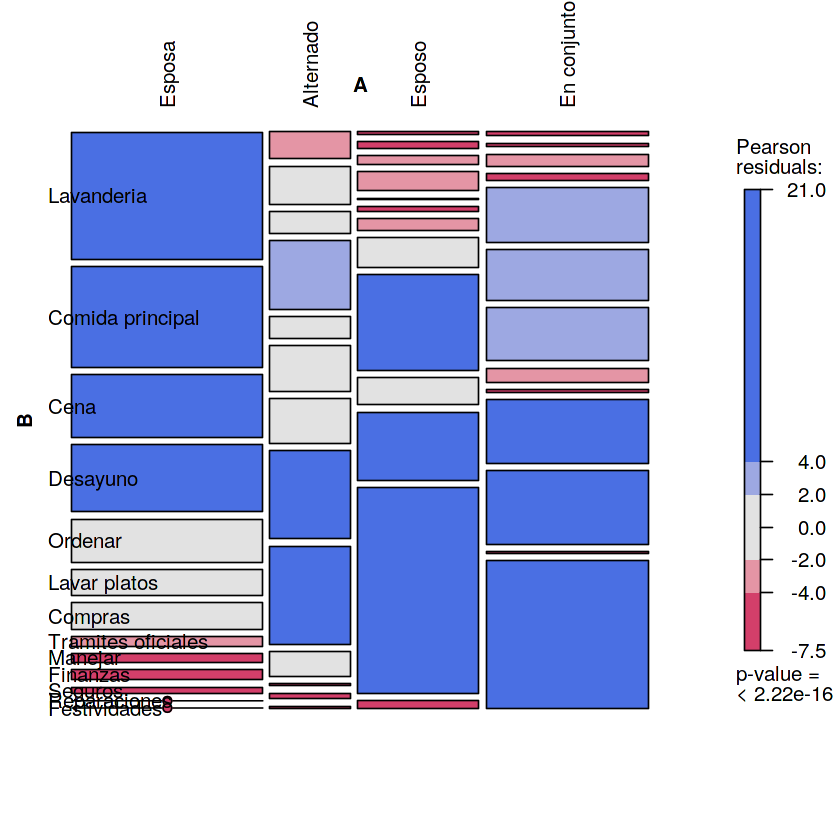

In [35]:
library(vcd)
dt<-as.table(as.matrix(tareas_hogar))
mosaic(
    #dt
    t(dt)
    ,shade=TRUE
    ,legend = TRUE
    #,direction = c("v","h","v", "h")
    ,direction = "v"
    ,labeling=labeling_border(
        rot_labels=c(90,0,0,0),
        just_labels=c(
            "left",
            "center",
            "center",
            "left"
        )
    )
)

In [22]:
help(mosaic)

In [15]:
print(tareas_hogar_ca)

**Results of the Correspondence Analysis (CA)**
The row variable has  13  categories; the column variable has 4 categories
The chi square of independence between the two variables is equal to 1944.456 (p-value =  0 ).
*The results are available in the following objects:

   name              description                   
1  "$eig"            "eigenvalues"                 
2  "$col"            "results for the columns"     
3  "$col$coord"      "coord. for the columns"      
4  "$col$cos2"       "cos2 for the columns"        
5  "$col$contrib"    "contributions of the columns"
6  "$row"            "results for the rows"        
7  "$row$coord"      "coord. for the rows"         
8  "$row$cos2"       "cos2 for the rows"           
9  "$row$contrib"    "contributions of the rows"   
10 "$call"           "summary called parameters"   
11 "$call$marge.col" "weights of the columns"      
12 "$call$marge.row" "weights of the rows"         


Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Welcome! Related Books: `Practical Guide To Cluster Analysis in R` at https://goo.gl/13EFCZ


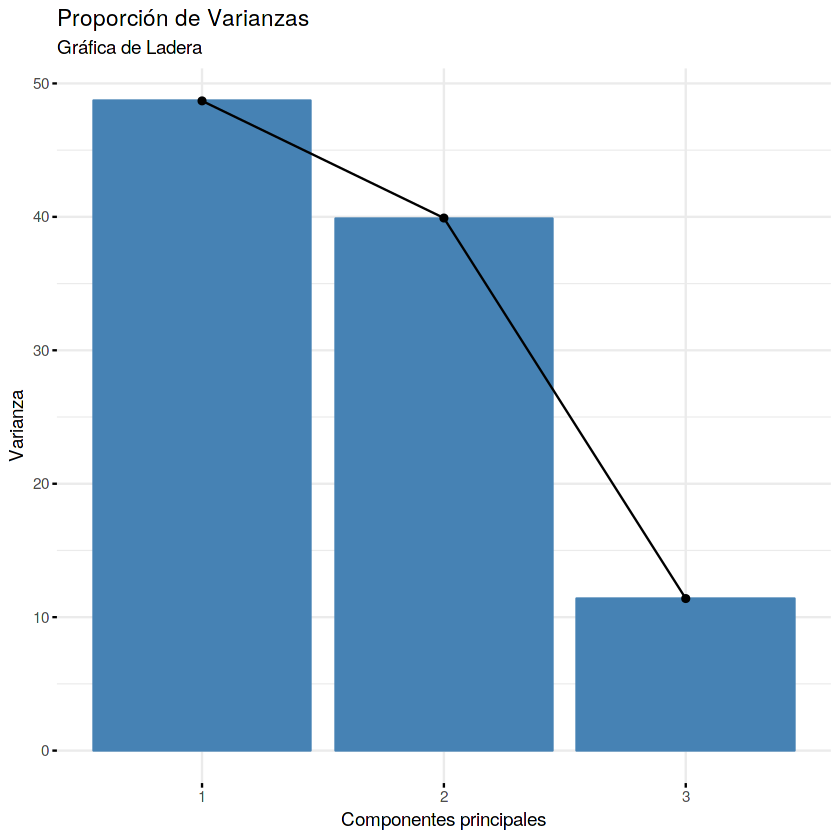

In [16]:
library(factoextra)

# Para eigenvalores, choice="eigenvalue"
mi_ggplot <- fviz_eig(tareas_hogar_ca, choice="variance")

mi_ggplot + 
    labs(
        title = "Proporción de Varianzas"
        ,subtitle = "Gráfica de Ladera"
        ,x = "Componentes principales"
        ,y = "Varianza"
    )

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.


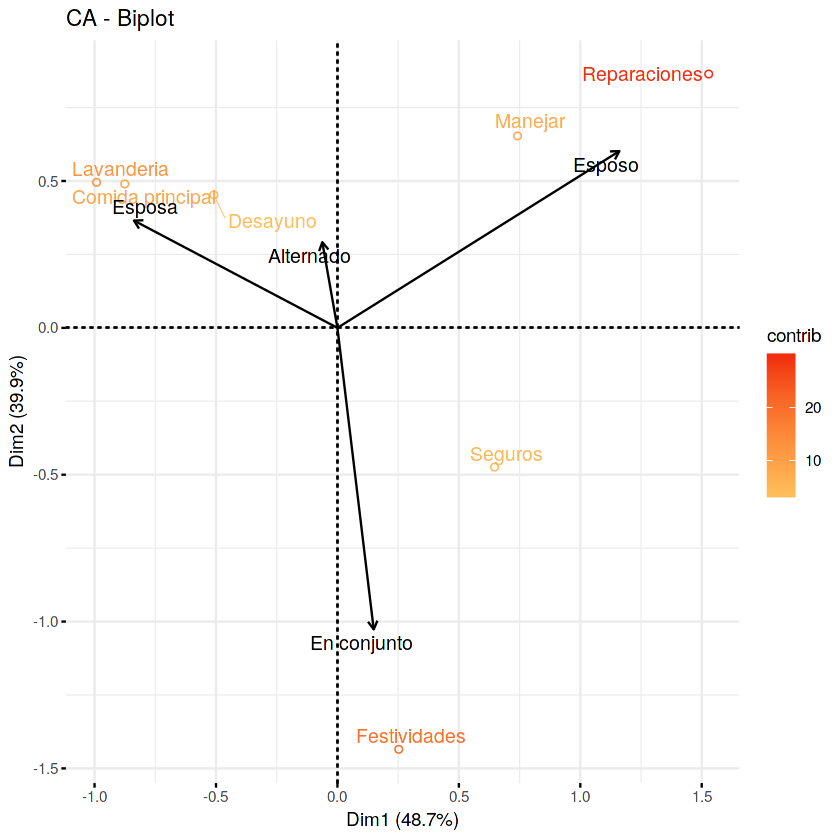

In [38]:
fviz_ca_biplot(
    tareas_hogar_ca,
    repel = TRUE,
    gradient.cols = c('#FFBD5A', '#F22D0F'),
    #gradient.cols = c('#FFBD5A','#FFA85B','#F22D0F'),
    col.row = "contrib", # Color por contribución
    #col.col = "#4682B4"
    col.col = "#000000", # Color de las columnas
    shape.row = 1, 
    shape.col = 4,
    # Dibujar flecha para c(ROW,COLUMN)
    arrow = c(FALSE, TRUE),
    select.row = list(contrib = 7), #seleccionar top 7 rows
    select.col = list(contrib = 4)
)